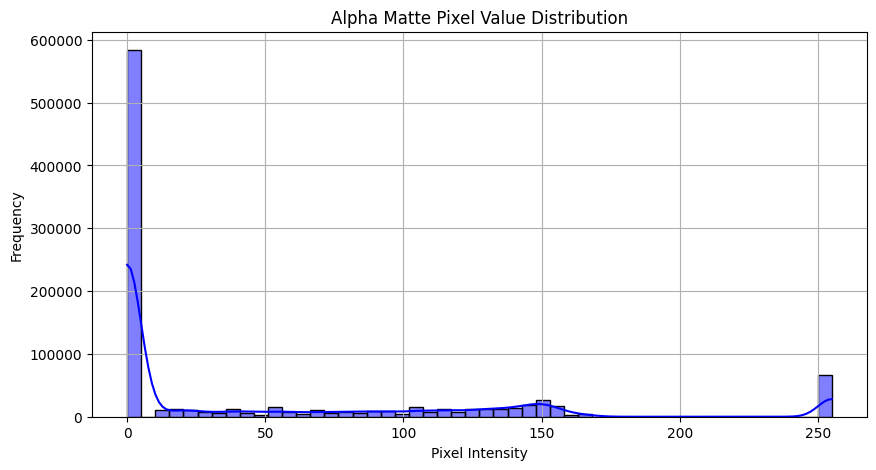

(0, 255)

In [2]:
# 필요한 라이브러리 다시 로드
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GT 알파 매트 파일 경로
alpha_matte_path = "./CHASE_DB1-test GT alpha matte/01_manual1.tif"

# 알파 매트 불러오기 (Grayscale 모드)
alpha_matte = cv2.imread(alpha_matte_path, cv2.IMREAD_GRAYSCALE)

# 픽셀 값의 최소, 최대값 확인
min_val, max_val = np.min(alpha_matte), np.max(alpha_matte)

# 픽셀 값 분포 확인 (히스토그램)
plt.figure(figsize=(10, 5))
sns.histplot(alpha_matte.ravel(), bins=50, kde=True, color='blue')
plt.title("Alpha Matte Pixel Value Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 결과 출력
min_val, max_val

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# GT 알파 매트 파일 경로
alpha_matte_path = "./CHASE_DB1-test GT alpha matte/01_manual1.tif"

# 알파 매트 불러오기 (Grayscale 모드)
alpha_matte = cv2.imread(alpha_matte_path, cv2.IMREAD_GRAYSCALE)

# 알파 매트 정규화 (0~1 범위)
alpha_matte = alpha_matte / 255.0

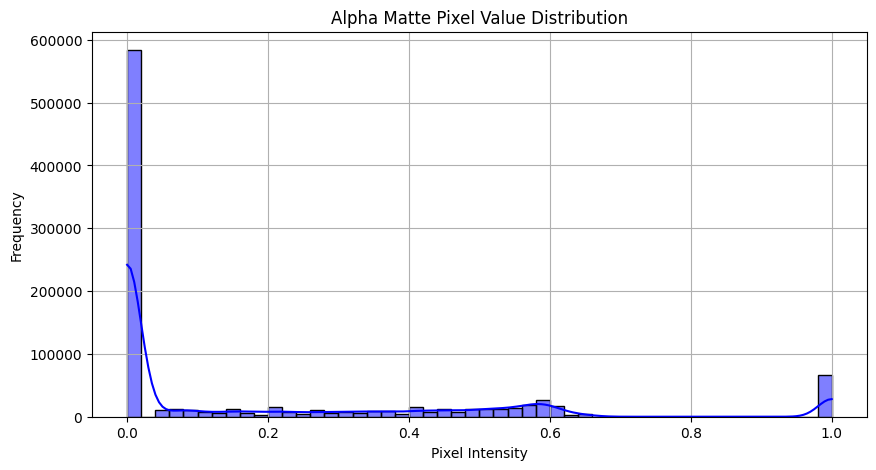

(0.0, 1.0)

In [4]:
# 픽셀 값의 최소, 최대값 확인
min_val, max_val = np.min(alpha_matte), np.max(alpha_matte)

# 픽셀 값 분포 확인 (히스토그램)
plt.figure(figsize=(10, 5))
sns.histplot(alpha_matte.ravel(), bins=50, kde=True, color='blue')
plt.title("Alpha Matte Pixel Value Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 결과 출력
min_val, max_val

In [5]:
# Threshold 설정
t_low = 0.1    # 배경 임계값
t_high = 0.9   # 전경 임계값

# Trimap 초기화
trimap = np.zeros_like(alpha_matte, dtype=np.uint8)

# Foreground (255) 설정
trimap[alpha_matte >= t_high] = 255  

# Background (0) 설정
trimap[alpha_matte <= t_low] = 0    

# Unknown (128) 설정
trimap[(alpha_matte > t_low) & (alpha_matte < t_high)] = 128  

In [8]:
# Dilation (팽창) 연산 적용
kernel_size = random.choice([3, 5, 7])  # 랜덤한 커널 크기 선택
kernel = np.ones((kernel_size, kernel_size), np.uint8)
trimap_dilated = cv2.dilate(trimap, kernel, iterations=1)

In [9]:
# Trimap 저장
trimap_output_path = "trimap_generated.tif"
cv2.imwrite(trimap_output_path, trimap_dilated)

True

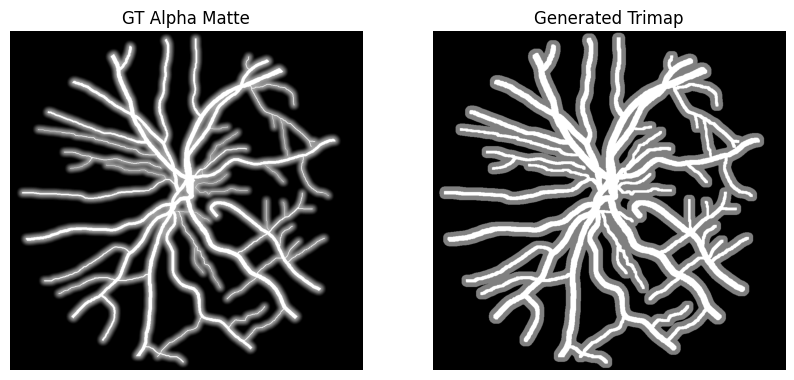

In [10]:
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(alpha_matte, cmap='gray')
plt.title("GT Alpha Matte")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(trimap_dilated, cmap='gray')
plt.title("Generated Trimap")
plt.axis("off")

plt.show()

In [1]:
!python /home/work/alphaMatte/alphamatte/closedform.py


=== Closed-Form Matting 처리 시작 ===


이미지를 불러오는 중...

알파 매트를 생성하는 중...
생성된 알파 매트 shape: (960, 999)

평가 지표를 계산하는 중...

=== 평가 결과 ===
MSE: 0.2613
SAD: 29.6958
Grad: 229.8307
Conn: 15726.1006

결과를 저장하는 중...
저장 완료: ./closedform_output/alpha_matte_tri02.tif
저장 완료: ./closedform_output/blended_result_tri02.tif
저장 완료: ./closedform_output/visualization_tri02.png


## 최종 코드

In [4]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# 입력 및 출력 폴더 경로 설정
input_folder = "./CHASE_DB1-test GT alpha matte"  
output_folder = "./CHASE_DB1-test_Trimap"  

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [5]:
# Threshold 설정
t_low = 0.1    # 배경 임계값
t_high = 0.9   # 전경 임계값

In [6]:
# 입력 폴더에서 모든 .tif 파일 가져오기
tif_files = [f for f in os.listdir(input_folder) if f.endswith(".tif")]

# .tif 파일 반복 처리
for tif_file in tif_files:
    # 파일 경로 설정
    alpha_matte_path = os.path.join(input_folder, tif_file)

    # 알파 매트 불러오기 (Grayscale 모드)
    alpha_matte = cv2.imread(alpha_matte_path, cv2.IMREAD_GRAYSCALE)

    if alpha_matte is None:
        print(f"파일 로드 실패: {tif_file}")
        continue

    # 알파 매트 정규화 (0~1 범위)
    alpha_matte = alpha_matte / 255.0  

    # Trimap 초기화
    trimap = np.zeros_like(alpha_matte, dtype=np.uint8)

    # Foreground (255) 설정
    trimap[alpha_matte >= t_high] = 255  

    # Background (0) 설정
    trimap[alpha_matte <= t_low] = 0    

    # Unknown (128) 설정
    trimap[(alpha_matte > t_low) & (alpha_matte < t_high)] = 128  

    # Dilation (팽창) 연산 적용
    kernel_size = random.choice([3, 5, 7])  # 랜덤한 커널 크기 선택
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    trimap_dilated = cv2.dilate(trimap, kernel, iterations=1)

    # Trimap 저장 경로 설정
    output_path = os.path.join(output_folder, tif_file.replace(".tif", "_trimap.tif"))

    # Trimap 저장
    cv2.imwrite(output_path, trimap_dilated)

    print(f"Trimap gen finish: {output_path}")

# 모든 Trimap 처리 완료 메시지 출력
print(f"\n all suecessful")

Trimap gen finish: ./CHASE_DB1-test_Trimap/01_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/02_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/03_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/04_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/05_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/06_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/07_manual1_trimap.tif
Trimap gen finish: ./CHASE_DB1-test_Trimap/08_manual1_trimap.tif

 all suecessful


전경(FG)과 배경(BG)별로 다른 크기의 Dilation 적용 (Guided Dilation)

In [19]:
# GT 알파 매트 파일 경로
alpha_matte_path = "./CHASE_DB1-test GT alpha matte/01_manual1.tif"

# 알파 매트 불러오기 (Grayscale 모드)
alpha_matte = cv2.imread(alpha_matte_path, cv2.IMREAD_GRAYSCALE)

# 알파 매트 정규화 (0~1 범위)
alpha_matte = alpha_matte / 255.0

In [20]:
# Threshold 설정
t_low = 0.1    # 배경 임계값
t_high = 0.9   # 전경 임계값

# Trimap 초기화
trimap = np.zeros_like(alpha_matte, dtype=np.uint8)

# Foreground (255) 설정
trimap[alpha_matte >= t_high] = 255  

# Background (0) 설정
trimap[alpha_matte <= t_low] = 0    

# Unknown (128) 설정
trimap[(alpha_matte > t_low) & (alpha_matte < t_high)] = 128  

In [21]:
# Foreground(255) Dilation → 작은 커널 사용
fg_kernel = np.ones((3, 3), np.uint8)  
fg_dilated = cv2.dilate((trimap == 255).astype(np.uint8), fg_kernel, iterations=1)

# Background(0) Dilation → 더 큰 커널 사용
bg_kernel = np.ones((7, 7), np.uint8)  
bg_dilated = cv2.dilate((trimap == 0).astype(np.uint8), bg_kernel, iterations=1)

# Unknown 영역 생성
trimap_guided = np.zeros_like(trimap)
trimap_guided[fg_dilated == 1] = 255
trimap_guided[bg_dilated == 1] = 0
trimap_guided[(fg_dilated == 0) & (bg_dilated == 0)] = 128  # Unknown 영역 유지

trimap_dilated = trimap_guided  # 최종 Trimap 적용


In [22]:
# Trimap 저장
trimap_output_path = "trimap_test1.tif"
cv2.imwrite(trimap_output_path, trimap_dilated)

True

In [30]:
!python /home/work/alphaMatte/alphamatte/closedform.py


=== Closed-Form Matting 처리 시작 ===


이미지를 불러오는 중...

알파 매트를 생성하는 중...
생성된 알파 매트 shape: (960, 999)

평가 지표를 계산하는 중...

=== 평가 결과 ===
MSE: 0.2545
SAD: 0.3003
Grad: 5.6456
Conn: 220.7784

결과를 저장하는 중...
저장 완료: ./closedform_output/alpha_matte_tri01.tif
저장 완료: ./closedform_output/blended_result_tri01.tif
저장 완료: ./closedform_output/visualization_tri01.png


커널 모양 설정

In [13]:
# GT 알파 매트 파일 경로
alpha_matte_path = "./CHASE_DB1-test GT alpha matte/01_manual1.tif"

# 알파 매트 불러오기 (Grayscale 모드)
alpha_matte = cv2.imread(alpha_matte_path, cv2.IMREAD_GRAYSCALE)

# 알파 매트 정규화 (0~1 범위)
alpha_matte = alpha_matte / 255.0

In [14]:
# Threshold 설정
t_low = 0.1    # 배경 임계값
t_high = 0.9   # 전경 임계값

# Trimap 초기화
trimap = np.zeros_like(alpha_matte, dtype=np.uint8)

# Foreground (255) 설정
trimap[alpha_matte >= t_high] = 255  

# Background (0) 설정
trimap[alpha_matte <= t_low] = 0    

# Unknown (128) 설정
trimap[(alpha_matte > t_low) & (alpha_matte < t_high)] = 128  

In [15]:
kernel_size = random.choice([3, 5, 7])  # 랜덤한 커널 크기 선택

kernel_shapes = {
    "rectangle": np.ones((kernel_size, kernel_size), np.uint8),  # 사각형 (기본값)
    "ellipse": cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)),  # 타원형
    "cross": cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size)),  # 십자형
}

# 랜덤한 커널 형태 선택
selected_shape = random.choice(list(kernel_shapes.keys()))
kernel = kernel_shapes[selected_shape]

trimap_dilated = cv2.dilate(trimap, kernel, iterations=1)
print(f"Applied Dilation with {selected_shape} kernel of size {kernel_size}x{kernel_size}")

Applied Dilation with cross kernel of size 3x3


In [16]:
# Trimap 저장
trimap_output_path = "./train_output/trimap_test4.tif"
cv2.imwrite(trimap_output_path, trimap_dilated)

True

In [17]:
!python /home/work/alphaMatte/alphamatte/closedform.py


=== Closed-Form Matting 처리 시작 ===


이미지를 불러오는 중...

알파 매트를 생성하는 중...
생성된 알파 매트 shape: (960, 999)

평가 지표를 계산하는 중...

=== 평가 결과 ===
MSE: 0.2613
SAD: 29.6958
Grad: 229.8307
Conn: 15726.1006

결과를 저장하는 중...
저장 완료: ./closedform_output/alpha_matte_tri02.tif
저장 완료: ./closedform_output/blended_result_tri02.tif
저장 완료: ./closedform_output/visualization_tri02.png
